# Class Hands on Lab

# I recommend to install python Anaconda
## The following is a list of installs if you want to use your own anaconda.
## How to run each cell? ==> shift +Enter

In [13]:
#!pip install matplotlib
#!pip install pandas
#!pip install seaborn
#!pip install scipy
#!pip install sklearn
!pip install -U scikit-learn

In [14]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


# try me:

In [29]:
y = 2+5
print(y)

7


In [30]:
print("this is  Y:",y)

this is  Y: 7


To read dataframe we will use Pandas.  Try pd. (press Tab -> will show you options)
Docs: https://pandas.pydata.org/docs/

In [31]:
# how to read a CSV file:
pd.read_csv(<path>,sep=",")

SyntaxError: invalid syntax (1804333381.py, line 2)

## Read the data

In [56]:
# file path - this for linux windows you will need "//"
f_path = "conn_attack.csv"

'''
record ID - The unique identifier for each connection record.
duration_  This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes This field represents the number of data bytes transferred from the source to the destination (i.e., the amount of out-going bytes from the host).
dst_bytes This feature represents the number of data bytes transferred from the destination to the source (i.e., the amount of bytes received by the host).
'''
df = pd.read_csv(f_path,names=["record ID","duration_", "src_bytes","dst_bytes"], header=None) # if we have in the file, header it will take it, and we won't be able to chose our namse 

In [57]:
# we could have nan values in the dataset (issue in the data) lets dropna()
df

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450
...,...,...,...,...
256665,256666,0,306,236
256666,256667,0,288,4017
256667,256668,0,289,1096
256668,256669,0,198,2169


Get the head of the data

In [58]:
# if you will add "." and later TAB you will see the different options
df.

SyntaxError: invalid syntax (331677654.py, line 2)

In [45]:
df.head()

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450


# # Pandas DataFrame

### A.  Handling missing data - detect if we have this case:

In [60]:
# determin the missing data precentage
df.apply(lambda x: sum(x.isna()) / len(df)) # is nan, if the data is missing, and sum() sum it up, len(df) the lenght of the data frame, and going over each column
# Applies this calculation to each column of the DataFrame.


record ID    0.0
duration_    0.0
src_bytes    0.0
dst_bytes    0.0
dtype: float64

### B. Remove na/nan:

##The Pandas function dropna() drops rows or columns (depending on the parameter you choose) that contain missing values. This function takes the axis parameter which you set as 0 to drop rows, and 1 to drop columns.

Please note that:

The alternative function is fillna() . This function will replace missing values with the value of your choice. You can replace with a fixed value such as 0, or you can use a calculation such as the mean. You can also apply different values to different columns by passing a dictionary of values per column.

In [61]:
df.shape # printing the shpae of the data set, rows X columns - size of the data set, Observations (rows) X features (columns)  

(256670, 4)

In [62]:
# check for nan values
df.isnull().any().any() # check if we have nan values.

False

#### Solution one: Drop nan

In [65]:
df = df.dropna() # At least one nan, it will drop


In [66]:
df.shape

(256670, 4)

#### imputation - replace nan with: mode() - most common value

The below code fills any missing values with the mode for that column. We used fill when we have features that do not have all placement in all cases.

In [67]:
df_numeric = df.apply(lambda x: x.fillna(x.mode()),axis=0)

#### C. Selecting subsets from our data

The loc method selects rows based on the index label. Let’s walk through a quick example.

In [68]:
df.head()

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450


In [71]:
number_range = range(0,200)
print(number_range)

range(0, 200)


In [72]:
subset_loc = df.loc[number_range]
subset_loc#.head()

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450
...,...,...,...,...
195,196,0,264,1356
196,197,0,264,16123
197,198,0,252,344
198,199,0,255,16123


In [73]:
subset_loc.shape

(200, 4)

The iloc method select rows by the index position. This might be used, for example, if the user does not know the index or if the index is not numeric.


Similar to loc

In [74]:
subset_iloc = df.iloc[[0, 1, 2]]
subset_iloc.head()

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364


In [75]:
df.src_bytes #getting this column

0         236
1         239
2         234
3         239
4         181
         ... 
256665    306
256666    288
256667    289
256668    198
256669    212
Name: src_bytes, Length: 256670, dtype: int64

In [76]:
df["src_bytes"] # same thing another way

0         236
1         239
2         234
3         239
4         181
         ... 
256665    306
256666    288
256667    289
256668    198
256669    212
Name: src_bytes, Length: 256670, dtype: int64

#### D. DataFrame "Where" The SQL alternative for searching

In [78]:
df.where(df['src_bytes'] > 240).dropna() # can give a condition for taking all the rows from src_bytes according to a condition

,record ID,duration_,src_bytes,dst_bytes
30,31.0,0.0,278.0,957.0
38,39.0,0.0,257.0,1738.0
60,61.0,0.0,256.0,597.0
61,62.0,0.0,253.0,1906.0
62,63.0,0.0,254.0,555.0
...,...,...,...,...
256663,256664.0,0.0,288.0,3435.0
256664,256665.0,0.0,306.0,244.0
256665,256666.0,0.0,306.0,236.0
256666,256667.0,0.0,288.0,4017.0


In [79]:
 # or /use this:
df[df['src_bytes'] > 240]

,record ID,duration_,src_bytes,dst_bytes
30,31,0,278,957
38,39,0,257,1738
60,61,0,256,597
61,62,0,253,1906
62,63,0,254,555
...,...,...,...,...
256663,256664,0,288,3435
256664,256665,0,306,244
256665,256666,0,306,236
256666,256667,0,288,4017


In [80]:
#or more complex:
df[(df['src_bytes']> 240) & (df['dst_bytes']> 1000)] # intersection

,record ID,duration_,src_bytes,dst_bytes
38,39,0,257,1738
61,62,0,253,1906
63,64,0,256,2595
70,71,0,260,1837
71,72,0,256,1169
...,...,...,...,...
256660,256661,0,289,1435
256662,256663,0,282,2288
256663,256664,0,288,3435
256666,256667,0,288,4017


In [81]:
ran_df = df[(df['src_bytes']> 240) & (df['dst_bytes']> 1000)]

In [82]:
ran_df.shape


(90108, 4)

#### E. Describe

In [84]:
df.describe() # s called on non-numeric data (e.g., strings, categories), it provides a summary of categorical data

,record ID,duration_,src_bytes,dst_bytes
count,256670.000000,256670.000000,256670.000000,2.566700e+05
mean,128335.500000,0.640936,474.247898,4.473533e+03
std,74094.391134,15.627170,3391.106084,2.080903e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,64168.250000,0.000000,217.000000,6.600000e+02
50%,128335.500000,0.000000,249.000000,1.661000e+03
75%,192502.750000,0.000000,306.000000,4.341000e+03
max,256670.000000,3289.000000,54540.000000,7.068759e+06


#### F. Dataset statistics calculations

In [86]:
#Mean
df['dst_bytes'].mean() # avarage according to a specific feature

4473.532613862158

In [87]:
df.dst_bytes.median()

1661.0

In [88]:
#Median of two seperate columns
df[["src_bytes", "dst_bytes"]].median()

src_bytes     249.0
dst_bytes    1661.0
dtype: float64

In [89]:
#Instead of the predefined statistics, specific combinations can be calculated
df.agg(
    {
        "duration_": ["min", "max", "median", "skew"],
        "dst_bytes": ["min", "max", "median", "mean"],
    }
)

,duration_,dst_bytes
min,0.000000,0.000000e+00
max,3289.000000,7.068759e+06
median,0.000000,1.661000e+03
skew,74.033196,NaN
mean,NaN,4.473533e+03


#### G. Grouping

In [90]:
df[["src_bytes", "dst_bytes"]].groupby("src_bytes").std()

,dst_bytes
src_bytes,
0,1530.729507
51,0.000000
137,NaN
138,20112.326825
139,9572.034347
...,...
53208,NaN
53452,3097.127702
53776,NaN


In [91]:
df.groupby(["src_bytes", "dst_bytes"])["duration_"].mean()

src_bytes  dst_bytes
0          0            0.084615
           17520        0.000000
51         8127         4.500000
137        407          0.000000
138        492          0.000000
                          ...   
54060      7300         0.000000
54540      2920         0.000000
           7300         0.000000
           8314         0.092593
           8315         0.000000
Name: duration_, Length: 134353, dtype: float64

## Data exploration

### Explore the data, understand the featues, statistics visualize the inputs
#### please try the following tools and extend them: this is for a soft start :) Explain how you explore the data. Why this is important? Please note this are only some examples


### Skewness:  is a statistical measure that describes the asymmetry of a distribution around its mean, indicating whether the distribution tails lean left or right. 
### Kurtosis:  on the other hand, measures the 'tailedness' of a distribution, indicating whether the data have heavy or light tails compared to a normal distribution.
### The idea is to dea how does the information distributed

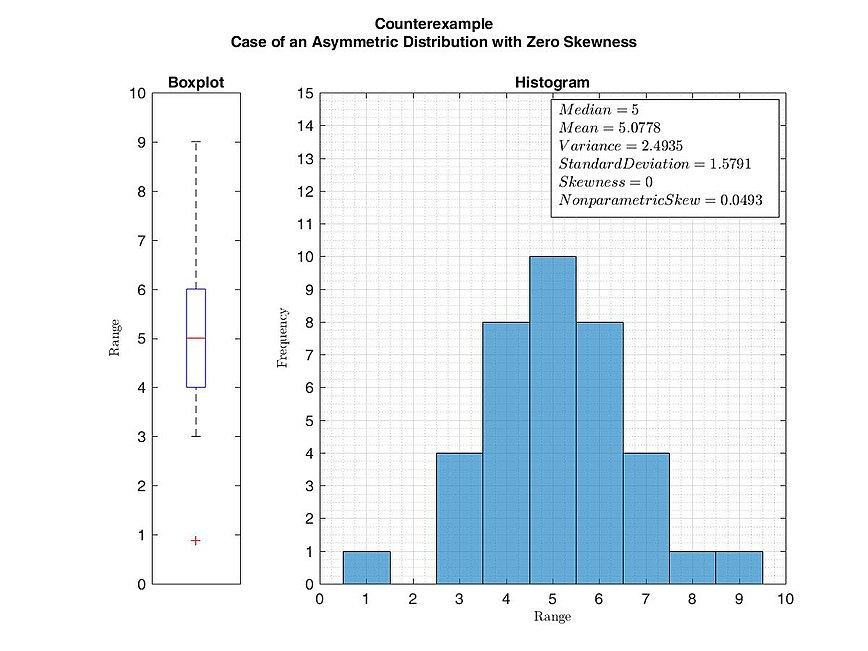

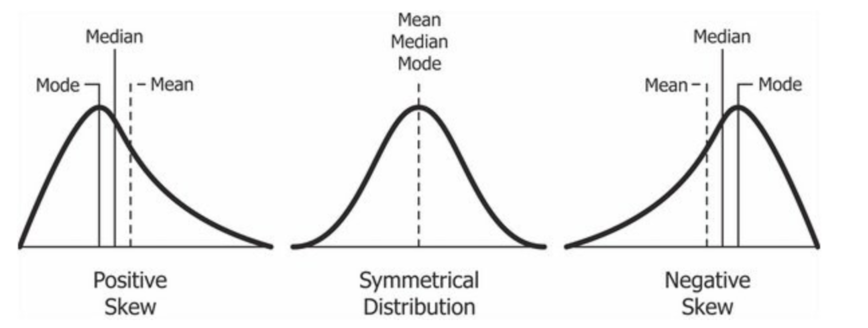

In [98]:
df['src_bytes'].mean()

474.2478980792457

In [142]:
#histogram
sns.histplot(df['src_bytes'])#,kde = True, bins=50)
#sns.distplot(df['src_bytes'])

<Axes: xlabel='src_bytes', ylabel='Count'>

In [115]:
'''
Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness.
'''
#skewness and kurtosis
print("Skewness: %f" % df['src_bytes'].skew())
print("Kurtosis: %f" % df['src_bytes'].kurt()) # positive show long tail , negative light tail

Skewness: 15.824471
Kurtosis: 248.739606


In [139]:
#sns.distplot(df['dst_bytes'])
sns.histplot(df['dst_bytes'])
print("Skewness: %f" % df['dst_bytes'].skew())
print("Kurtosis: %f" % df['dst_bytes'].kurt())

Skewness: 207.100418
Kurtosis: 61028.785029


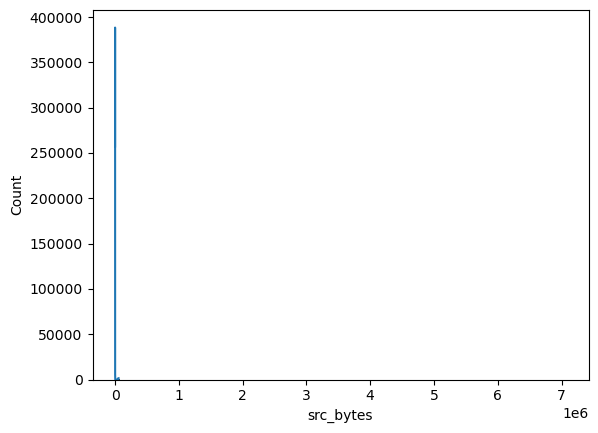

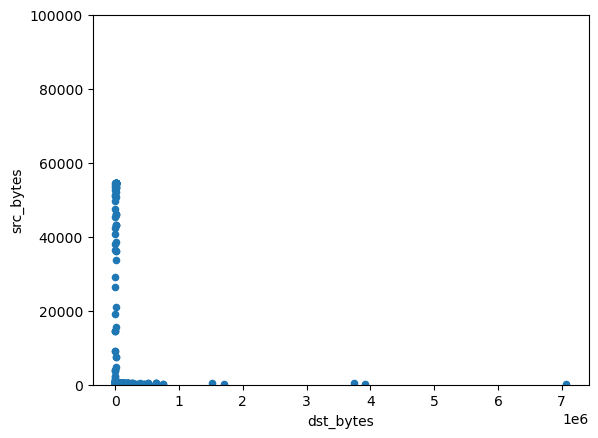

In [140]:
#Relationship with numerical variables
var = 'dst_bytes'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,100000)); # do not `assume here any thing this is just examples
plt.show() # Display

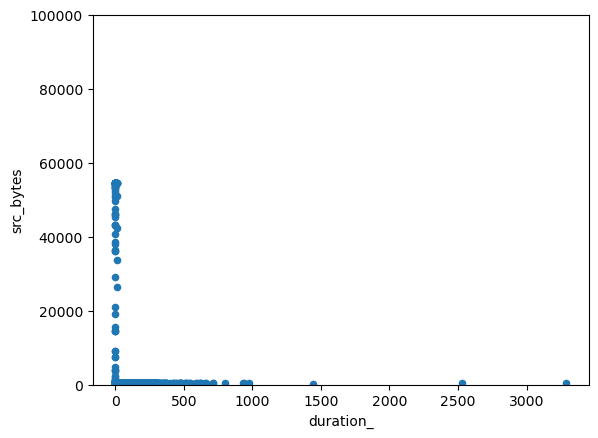

In [154]:
#scatter plot totalbsmtsf/saleprice
var = 'duration_'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,100000));# xlim = (0,5000));
plt.show() # Display


### Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.
### Negative -  different directions, (but they might have non-linear correlation)
### zero -  no correlation
### one - identical

In [165]:
df.corr() # Correlation between all of the features
#selected_features = ['record ID', 'duration_']
#df[selected_features].corr()

,record ID,duration_,src_bytes,dst_bytes
record ID,1.000000,0.027244,0.019209,-0.002970
duration_,0.027244,1.000000,-0.001714,-0.005791
src_bytes,0.019209,-0.001714,1.000000,0.010770
dst_bytes,-0.002970,-0.005791,0.010770,1.000000


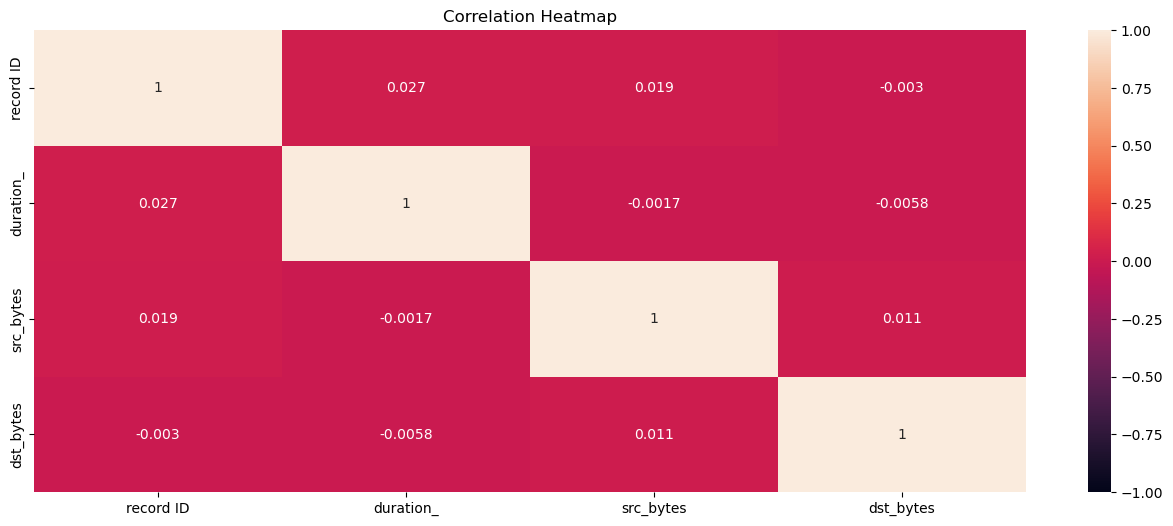

In [166]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

plt.show()  # Display the heatmap

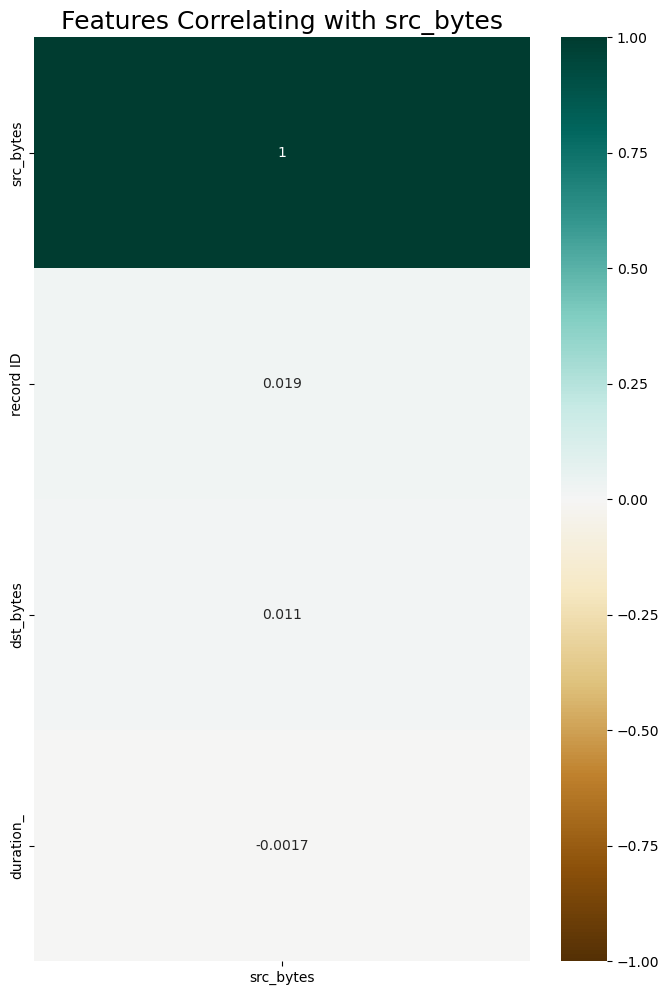

In [131]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['src_bytes']].sort_values(by='src_bytes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with src_bytes', fontdict={'fontsize':18});
plt.show()

# Introduction to ML in python

I will take here a supervided dataset. The idea is to demonstrate you some concepts

In [168]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
# Load Dataset
X, y = datasets.load_iris(return_X_y=True) # note this is a known dataset with dedicated loader. In your work you can use a custom one.
X.shape, y.shape # x - 150 observation to 4 feature, y - 150 labels, they must be equal!

((150, 4), (150,))

### Dataset:
Train and Validation are used in the training while Test is left out for model verification

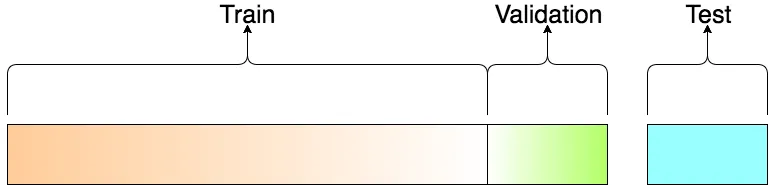

# Introduction to Cross Validation

In machine learning we need to estimate the performance of a model before we put it into production. 

While we could just evaluate our model's performance on the same data that we used to fit its parameters.
doing so will give us unreliable assessments of our model's ability to generalize to unseen data.

source: https://mlu-explain.github.io/cross-validation/

### Leave-One-Out Cross Validation (LOOCV)

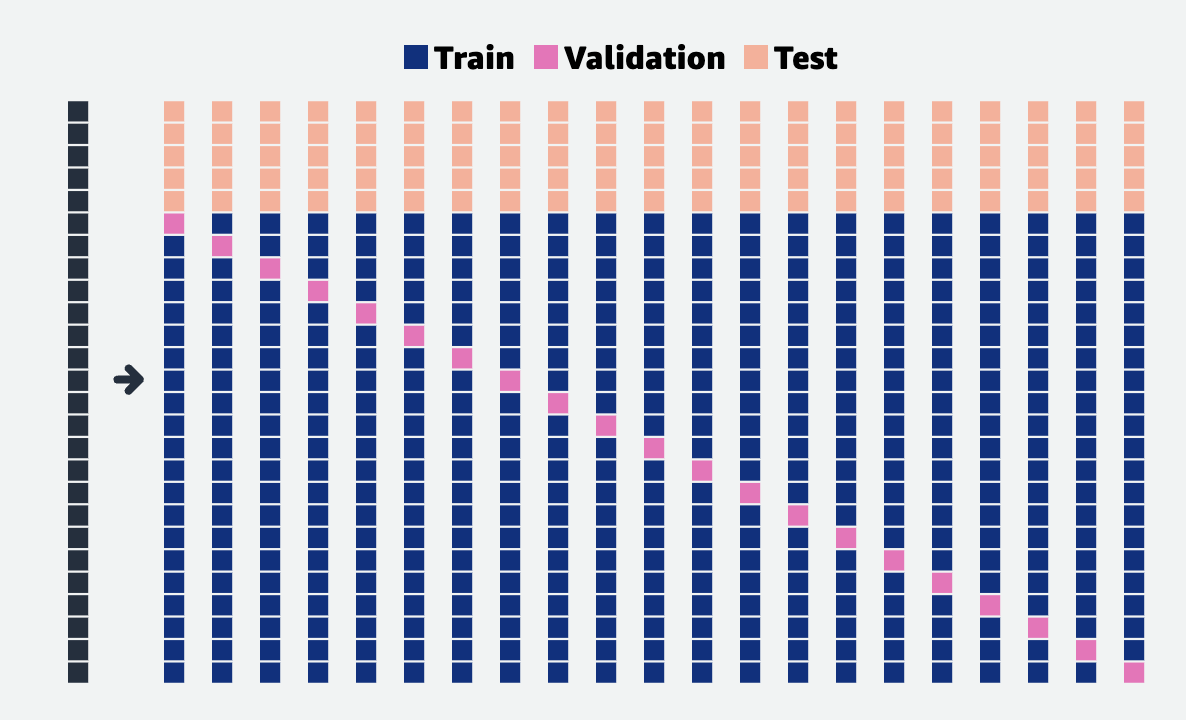

### K-Fold Cross-Validation

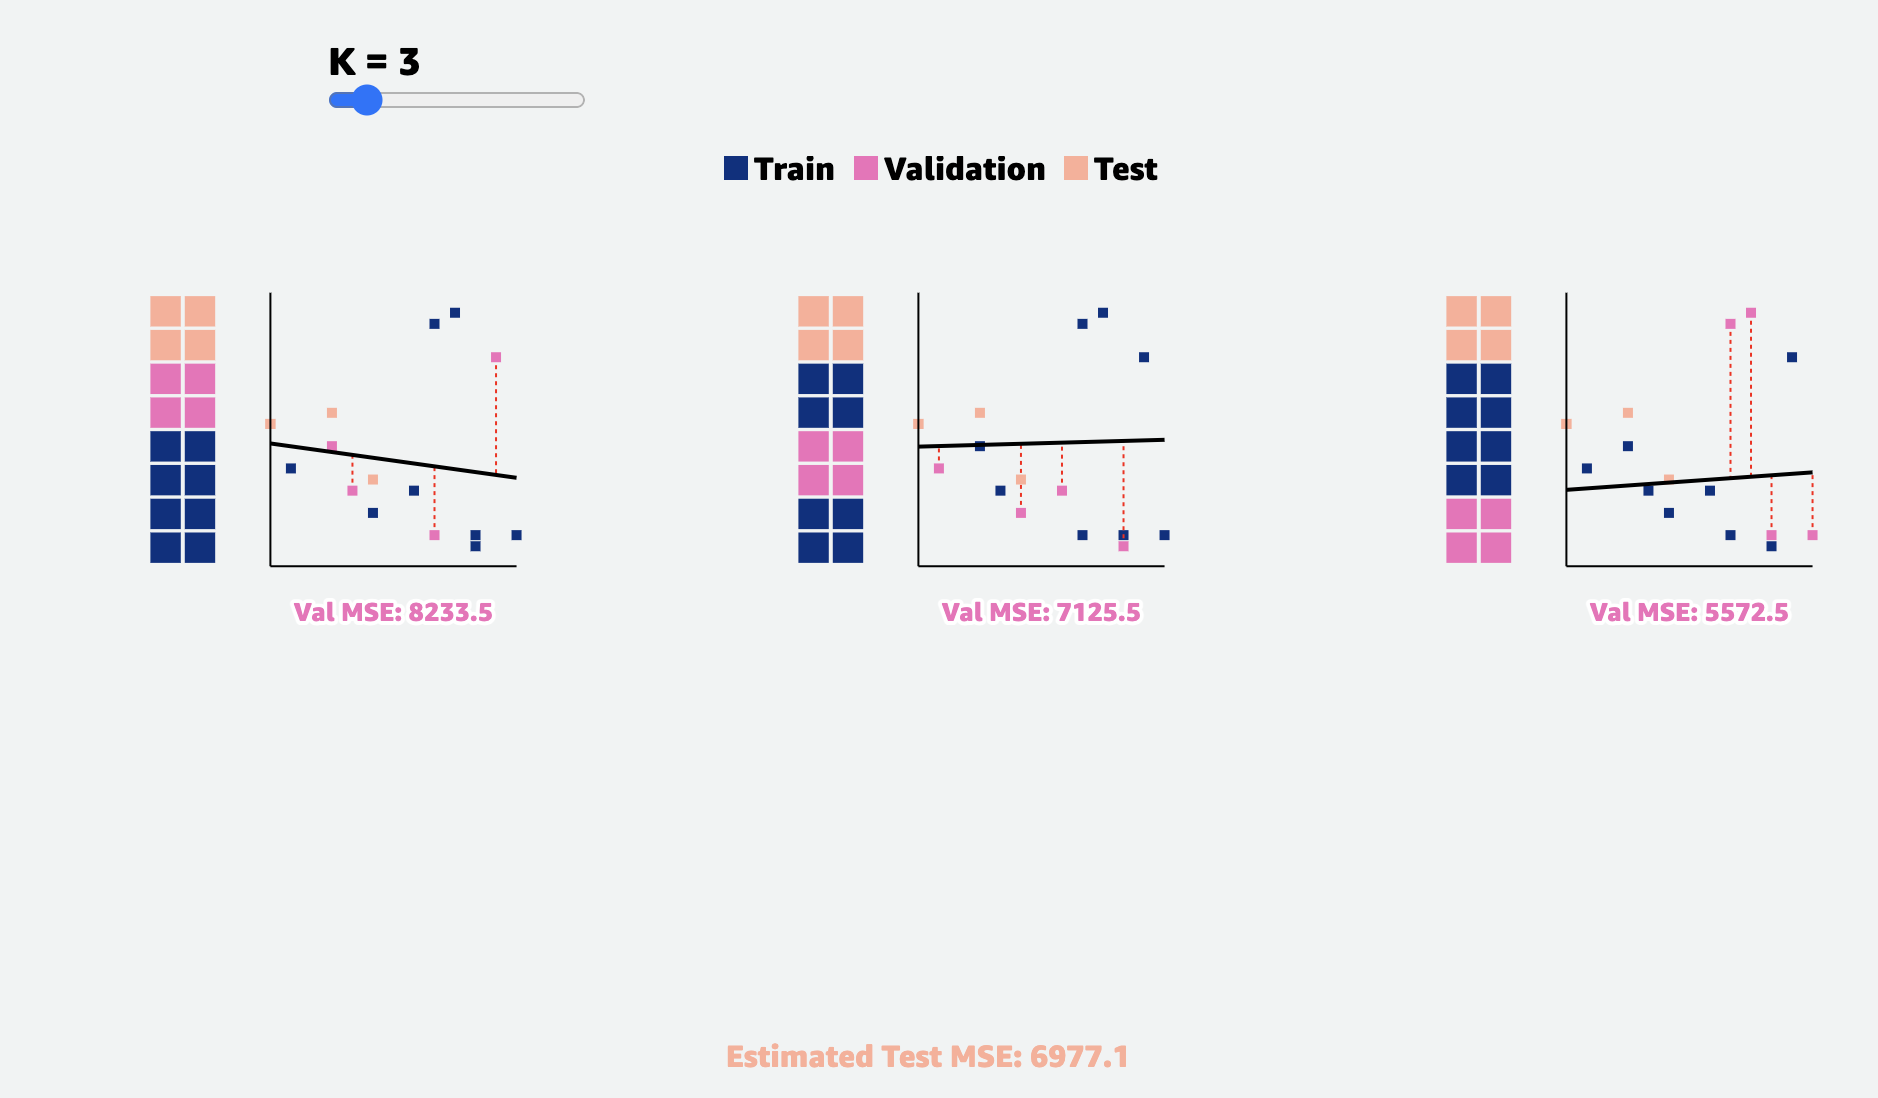

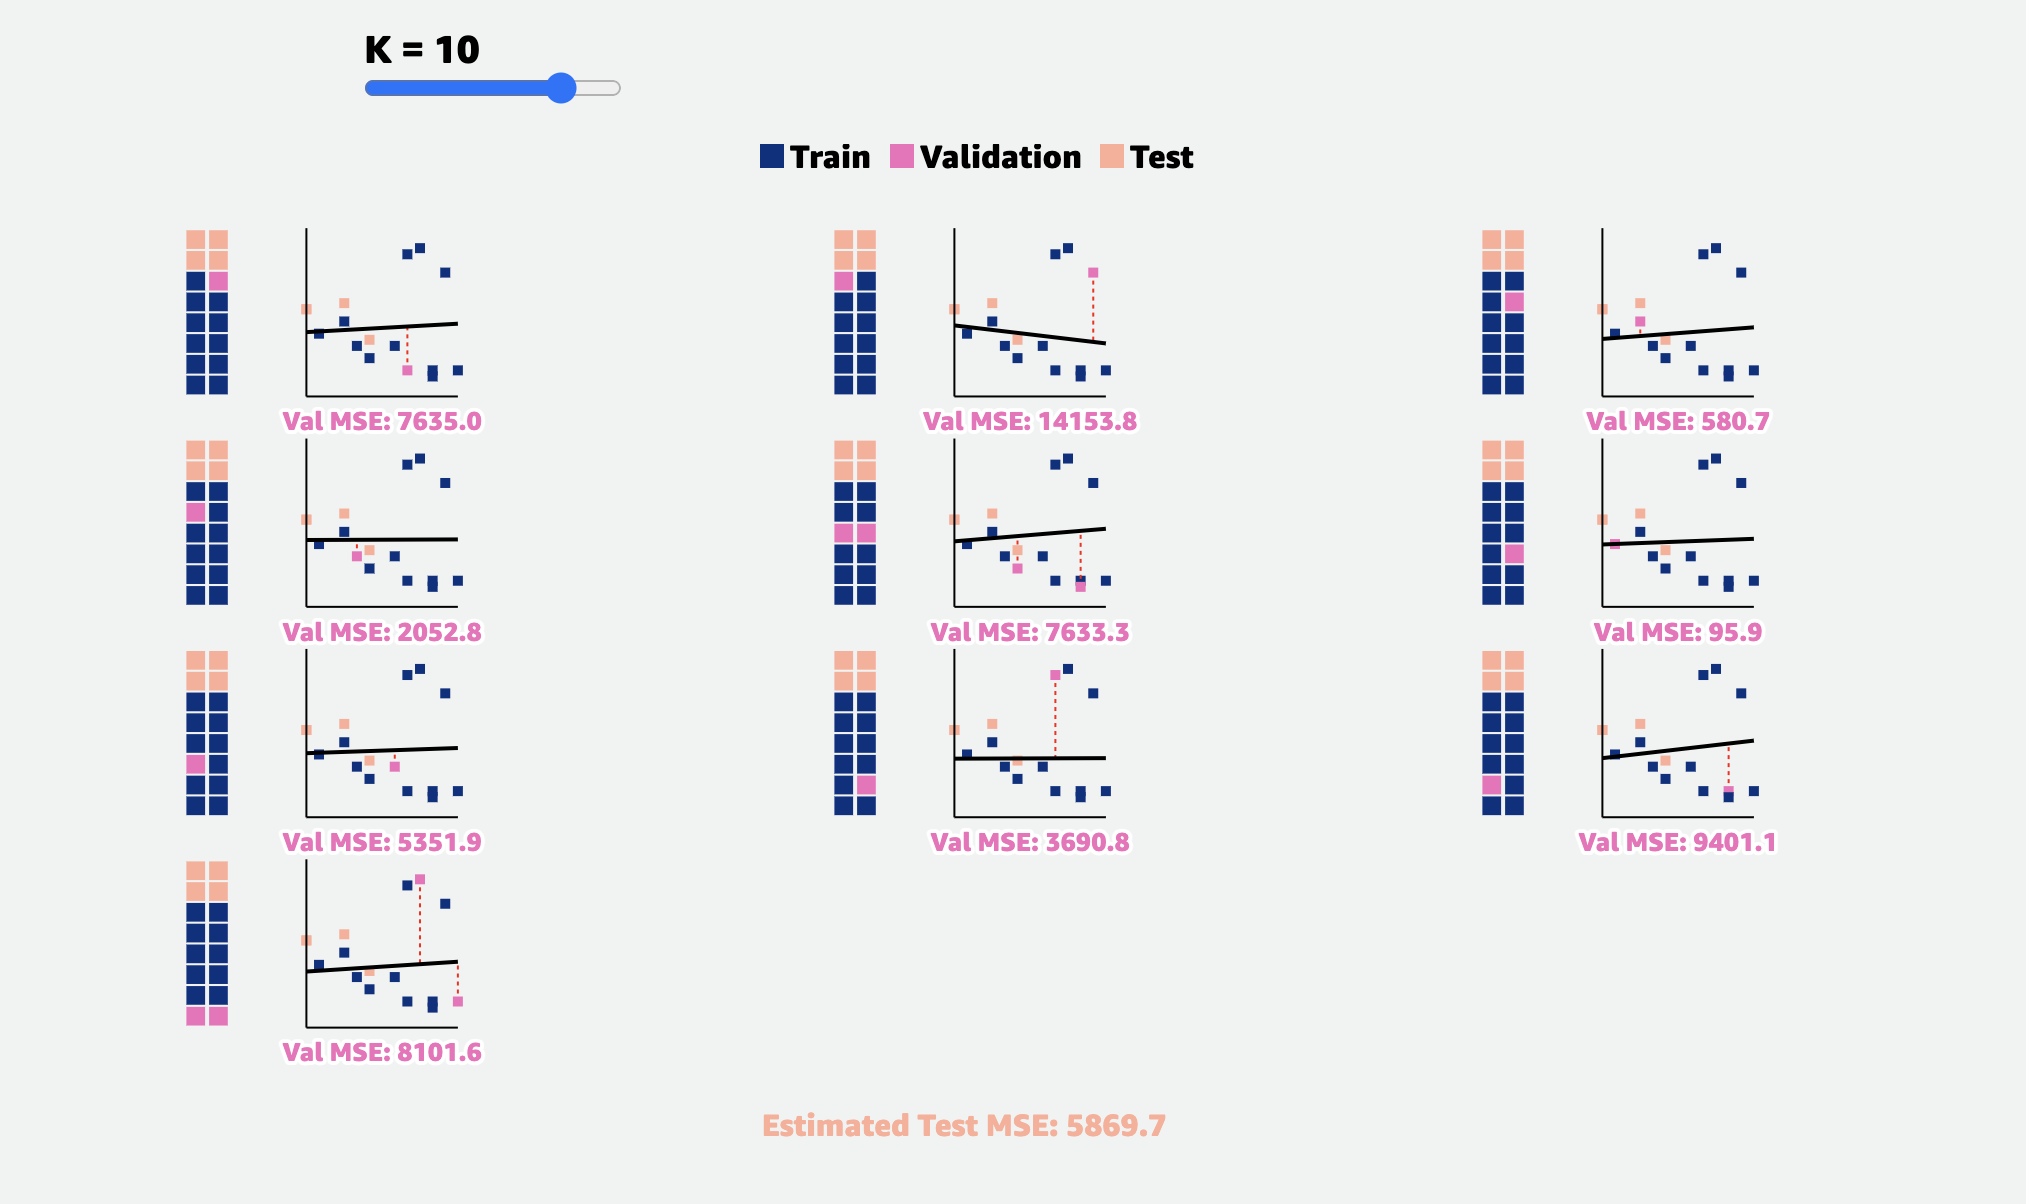

Let's split the data 80:20

In [170]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0) # 80%, 20%, and giving the random seed a number

print("Train:",X_train.shape, y_train.shape)

print("Test", X_test.shape, y_test.shape)

# Validation can be taken from the Train:
# Further split the training set into 75% training and 25% validation
# This results in 60% training, 20% validation, and 20% testing of the original dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 75% 25%

Train: (120, 4) (120,)
Test (30, 4) (30,)


In [194]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=2)

X_train.shape, y_train.shape

X_test.shape, y_test.shape
'''
When evaluating different settings (“hyperparameters”) for estimators, such as the C 
setting that must be manually set for an SVM, there is still a risk of overfitting
on the test set because the parameters can be tweaked until the estimator performs optimally. 
You can optimize "C" with GridSearch.
'''
# This line is the training
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train) # constructor, classifier svc, and gettinf x for training, and y - labels, we can save the model as a file, with pickle
print('the accuracy here is :',clf.score(X_test, y_test))
#let's predict the data
y_predicted = clf.predict(X_test) # the labels that the model think are true
# lets review the labels
labels = np.unique(y)
print("unique labels",labels) # multiclass
# The confusion matrix is:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted, labels=labels) # the diagonal is the correct, every thing else is the mistake

the accuracy here is : 0.9666666666666667
unique labels [0 1 2]


array([[23,  0,  0],
       [ 0, 16,  0],
       [ 0,  2, 19]], dtype=int64)

Here we have a problem:
    
    Our data is trained with non optimized parameters.

How can we solve it?:
     
     cross-validation  + k-Fold
     
     The k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

    A model is trained using  of the folds as training data;

    the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
    

In [195]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("we are getting in scores the result of each iterration. Len:",len(scores), "values:", scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("The Max set was: ", scores.max())
print("NOTE: the result here are different! why? - OVERFITING")

we are getting in scores the result of each iterration. Len: 5 values: [0.96666667 1.         0.96666667 0.96666667 1.        ]
0.98 accuracy with a standard deviation of 0.02
The Max set was:  1.0
NOTE: the result here are different! why? - OVERFITING


Now let's see how can we use data normalization with this example

In [196]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print("Let's see if the training size effect us ? change the test size from 0.2 to 0.4")
#standardScaler normalization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
print("result score: ",clf.score(X_test_transformed, y_test))


#changing:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)
print("changed")
#standardScaler normalization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
print("result score: ",clf.score(X_test_transformed, y_test))
clf.predict(X_test_transformed)
confusion_matrix(y_test, y_predicted, labels=labels)

Let's see if the training size effect us ? change the test size from 0.2 to 0.4
result score:  1.0
changed
result score:  0.9333333333333333


array([[ 5,  6,  5],
       [10,  6,  7],
       [ 8,  6,  7]], dtype=int64)

### Data Normalization

In [197]:
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / std

SyntaxError: invalid syntax (3126413611.py, line 1)

In [198]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
print("The mean is : ", scaler.mean_)
print(scaler.transform(data), " the mean: ",scaler.transform(data).mean(),"STD: ", scaler.transform(data).std() )
print(scaler.transform([[2, 2]]))

StandardScaler()
The mean is :  [0.5 0.5]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]  the mean:  0.0 STD:  1.0
[[3. 3.]]


Lets write it with piplines:

In [199]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X, y, cv=10) #note -we can use other CV methods see sklearn.


array([1.        , 0.93333333, 1.        , 0.93333333, 1.        ,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])

Let's try a different pipline approach

In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
classifier_names = ["Logistic Regression", "KNN", "Random Forest","SVM"]

classifiers = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), LinearSVC()]

zipped_clf = zip(classifier_names,classifiers)

In [201]:
def classifier(classifier, t_train, c_train, t_test, c_test):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('standardize', StandardScaler()),                         
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_acc = fit_classifier(checker_pipeline, t_train, c_train, t_test,c_test)
        result.append((n,clf_acc))
    return result

In [202]:
def fit_classifier(pipeline, x_train, y_train, x_test, y_test):
    model_fit = pipeline.fit(x_train, y_train)
    y_pred = model_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [203]:
result = classifier(zipped_clf, X_train, y_train, X_test, y_test)


Validation result for Logistic Regression
LogisticRegression()
accuracy score: 93.33%
Validation result for KNN
KNeighborsClassifier()
accuracy score: 93.33%
Validation result for Random Forest
RandomForestClassifier()
accuracy score: 91.67%
Validation result for SVM
LinearSVC()
accuracy score: 91.67%


### Measuring metrics:
#### Accuracy:  shows how often a classification ML model is correct overall. 
#### Precision shows how often an ML model is correct when predicting the target class.
#### Recall shows whether an ML model can find all objects of the target class. 

Figure are taken from here: https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~:text=TL%3BDR,objects%20of%20the%20target%20class.

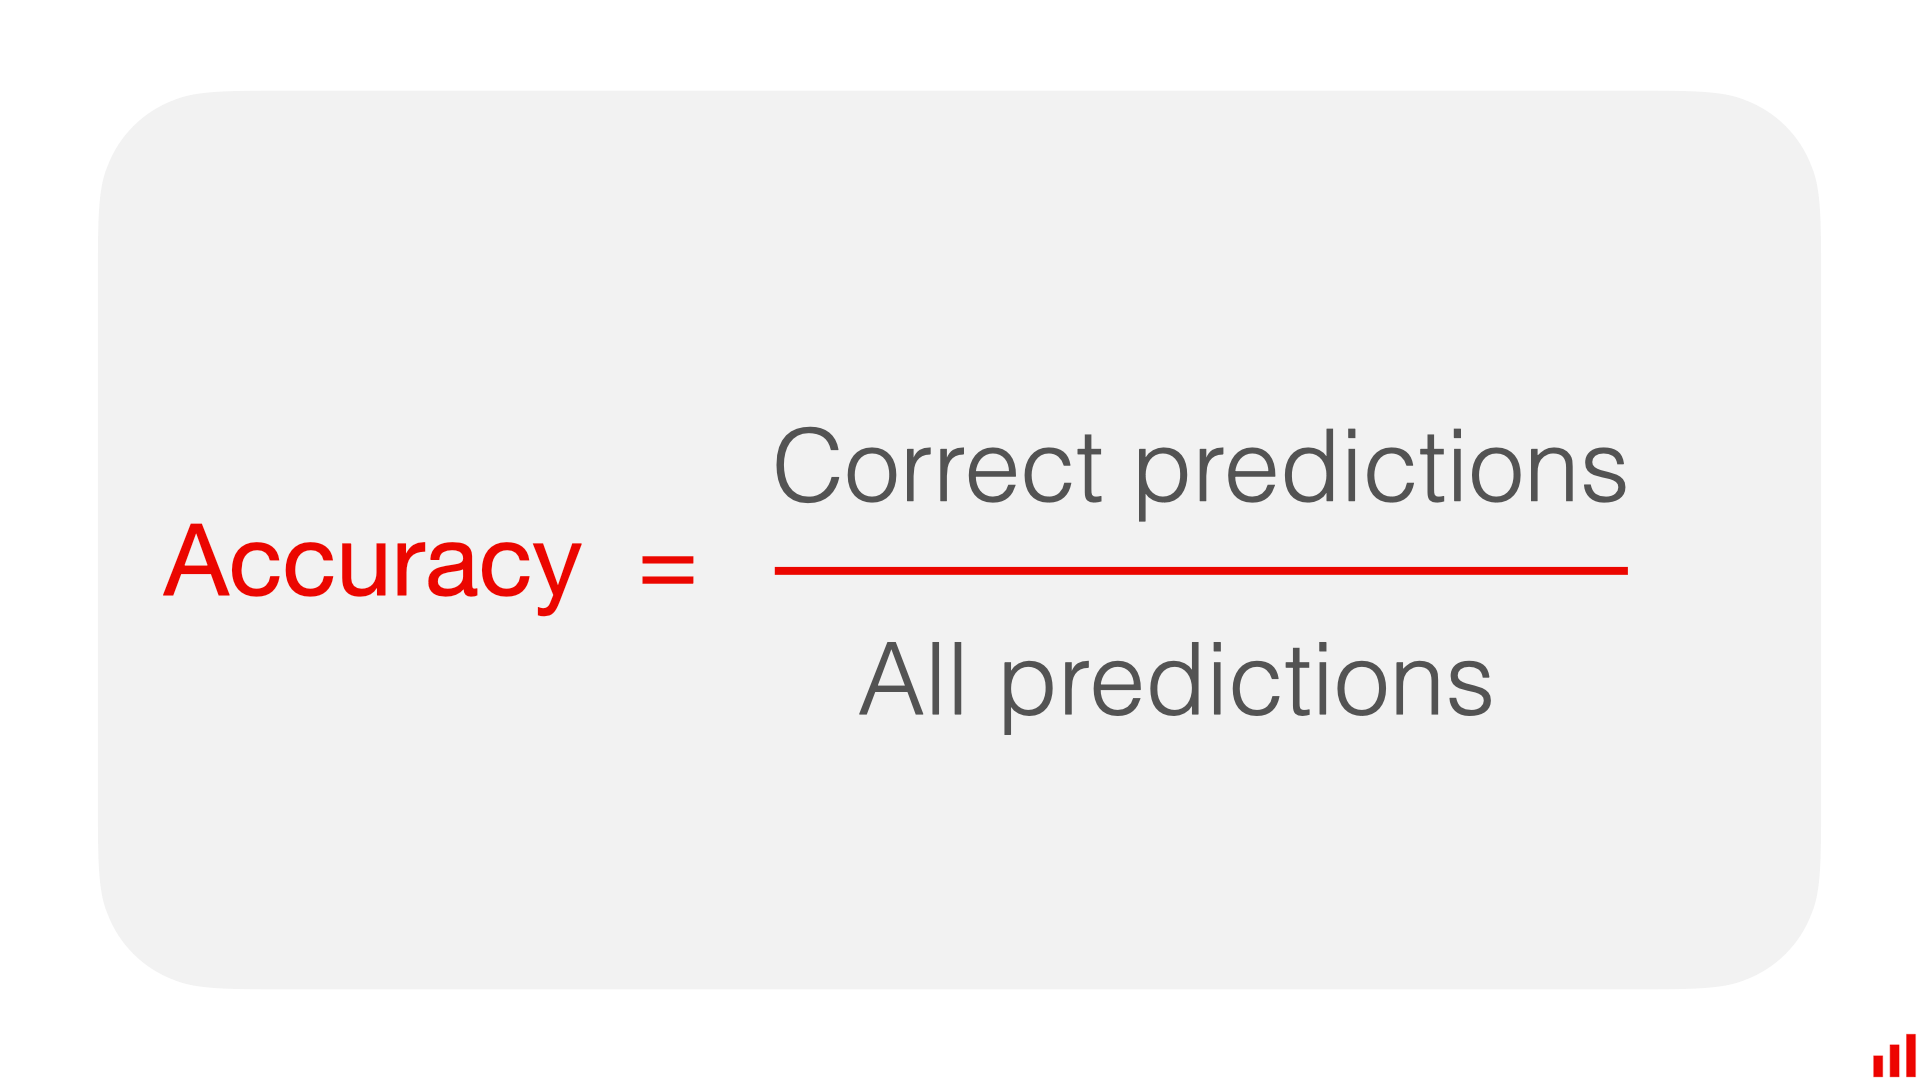


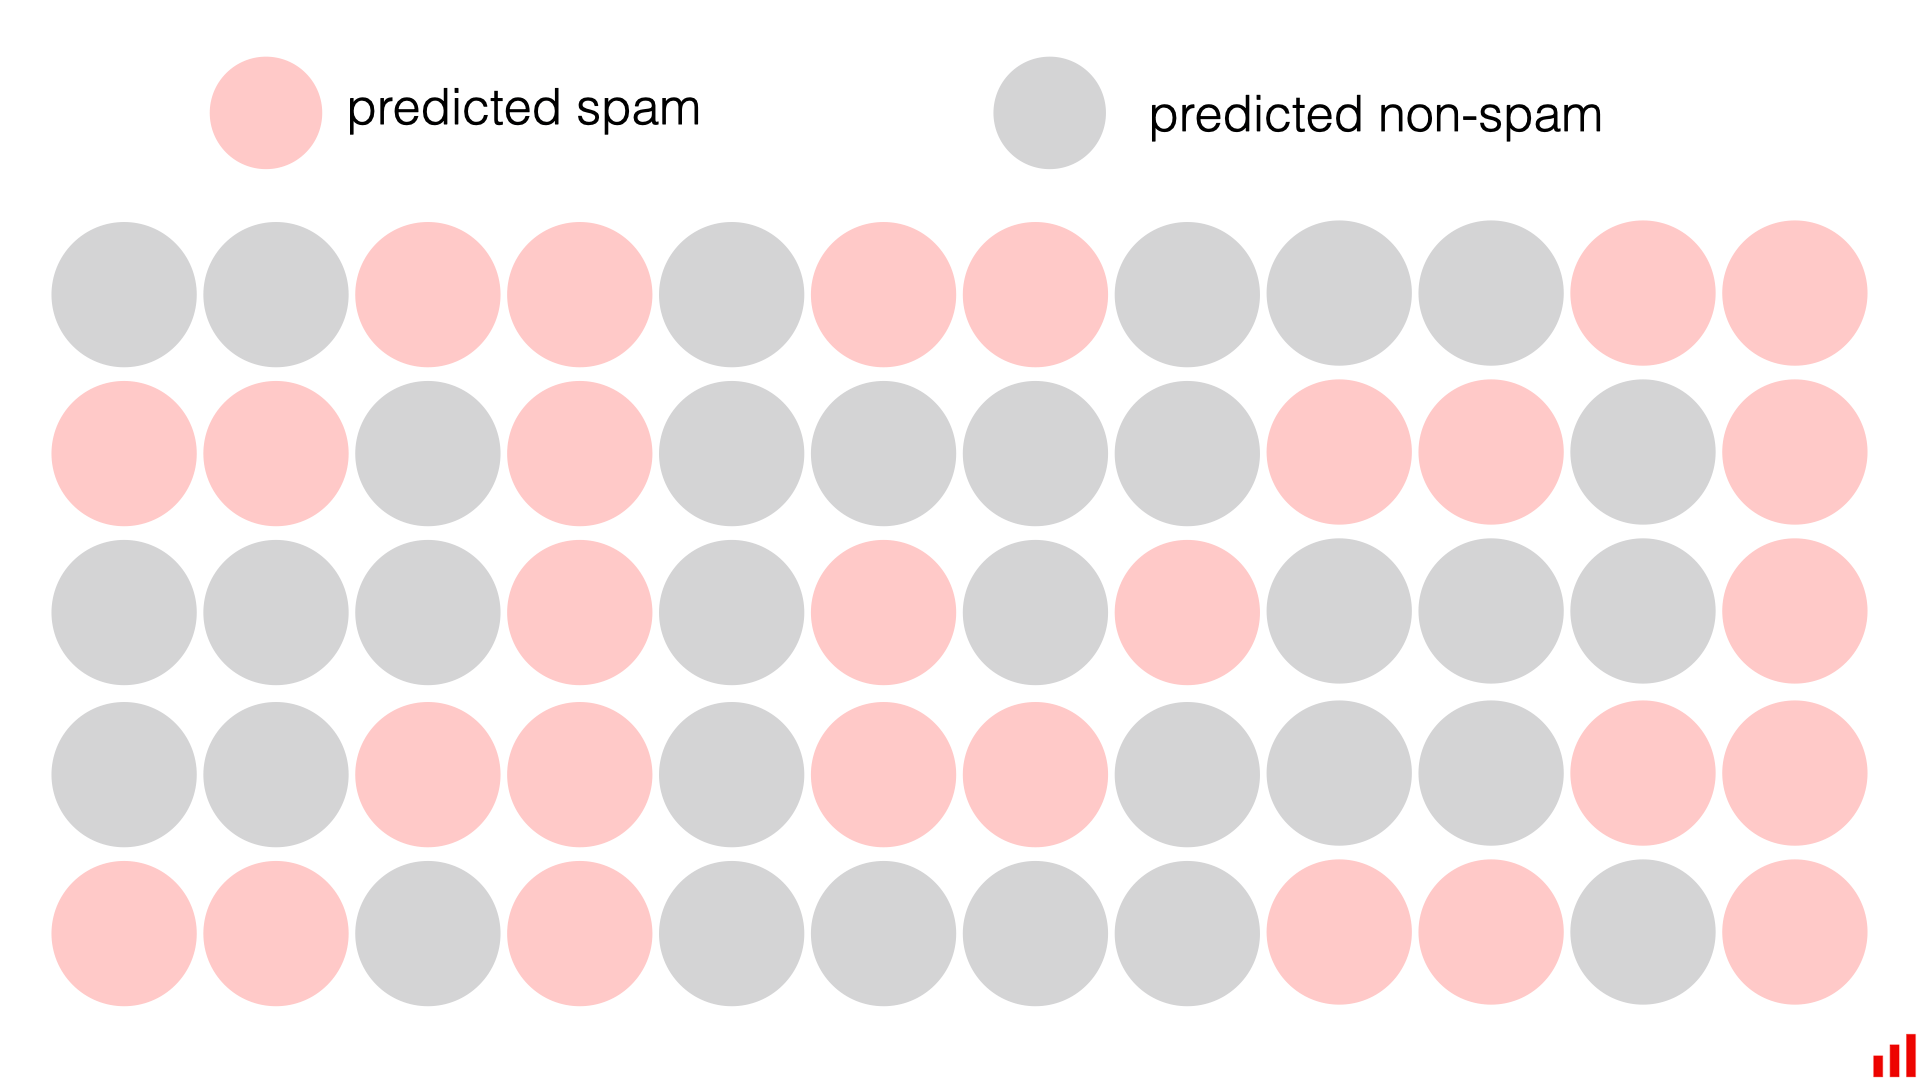

In our case, 52 out of 60 predictions (labeled with a green “tick” sign) were correct. Meaning the model accuracy is 87%. 

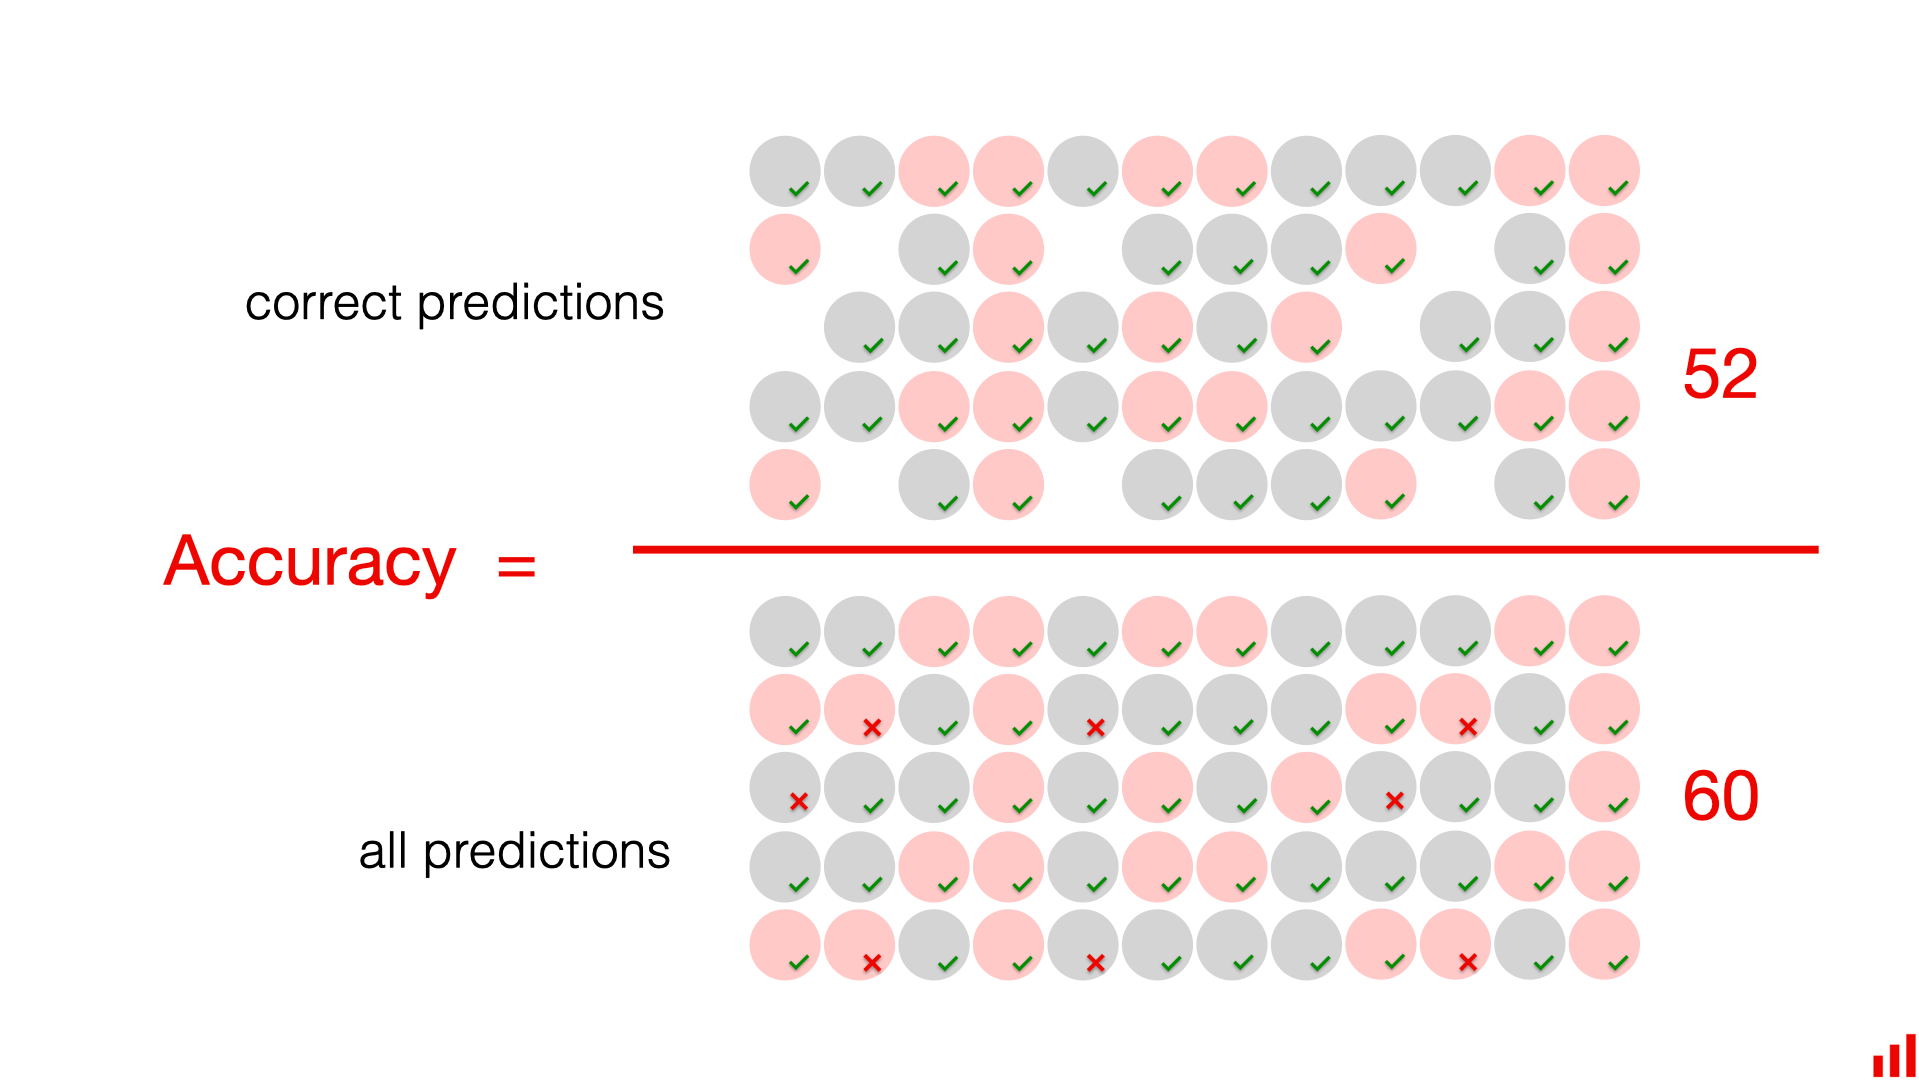

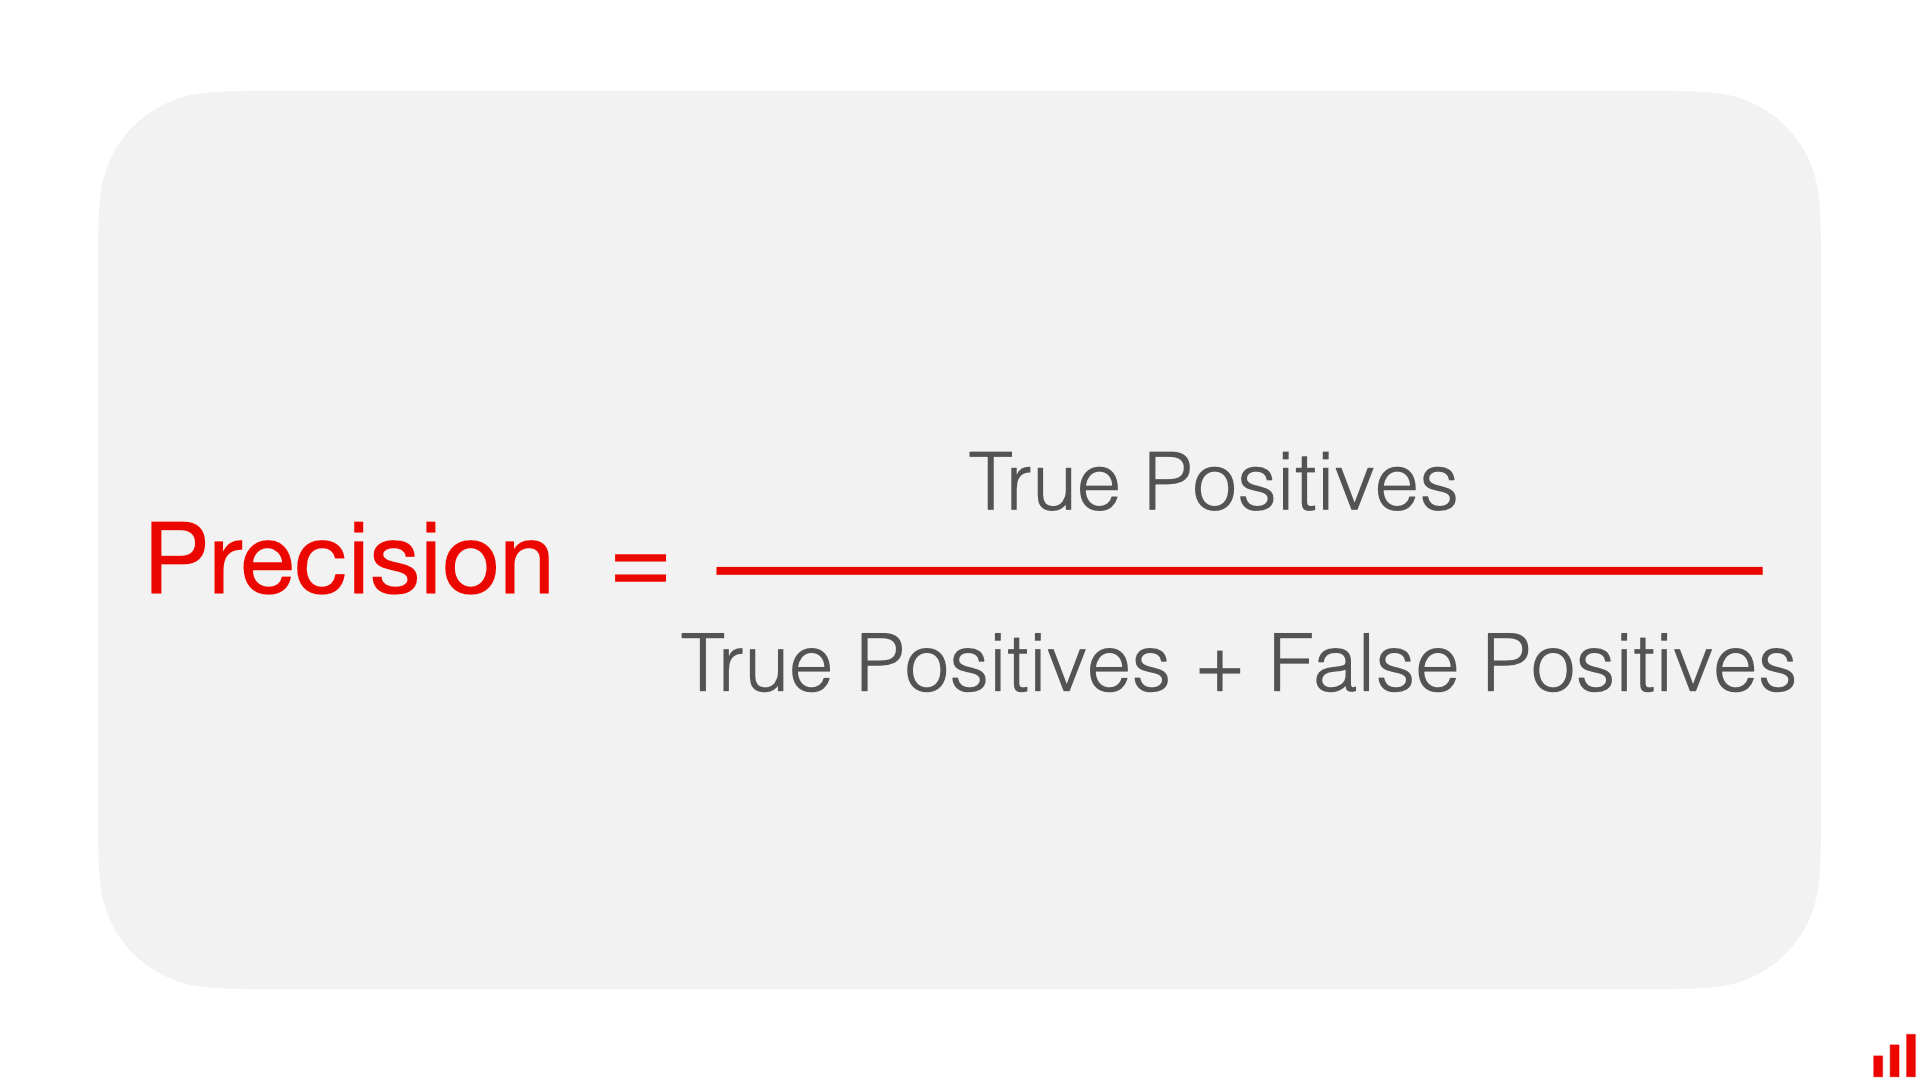

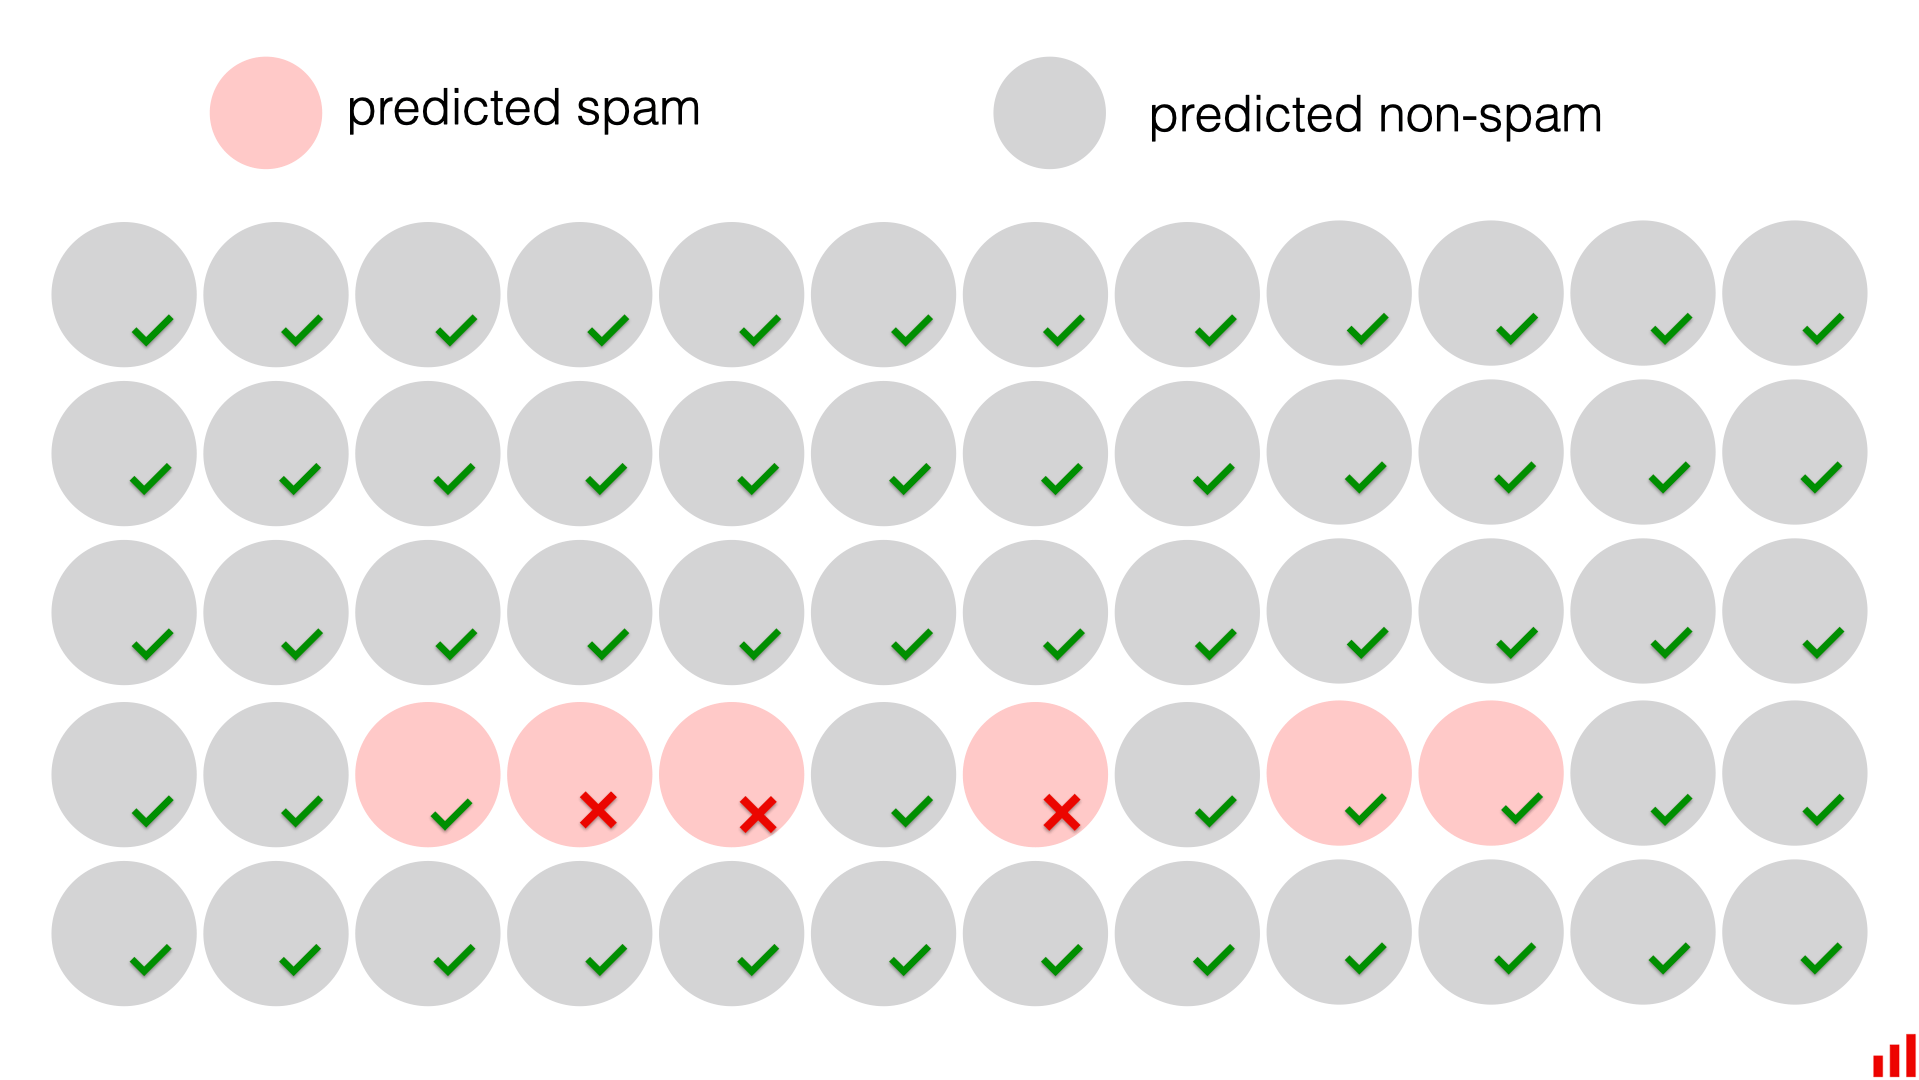

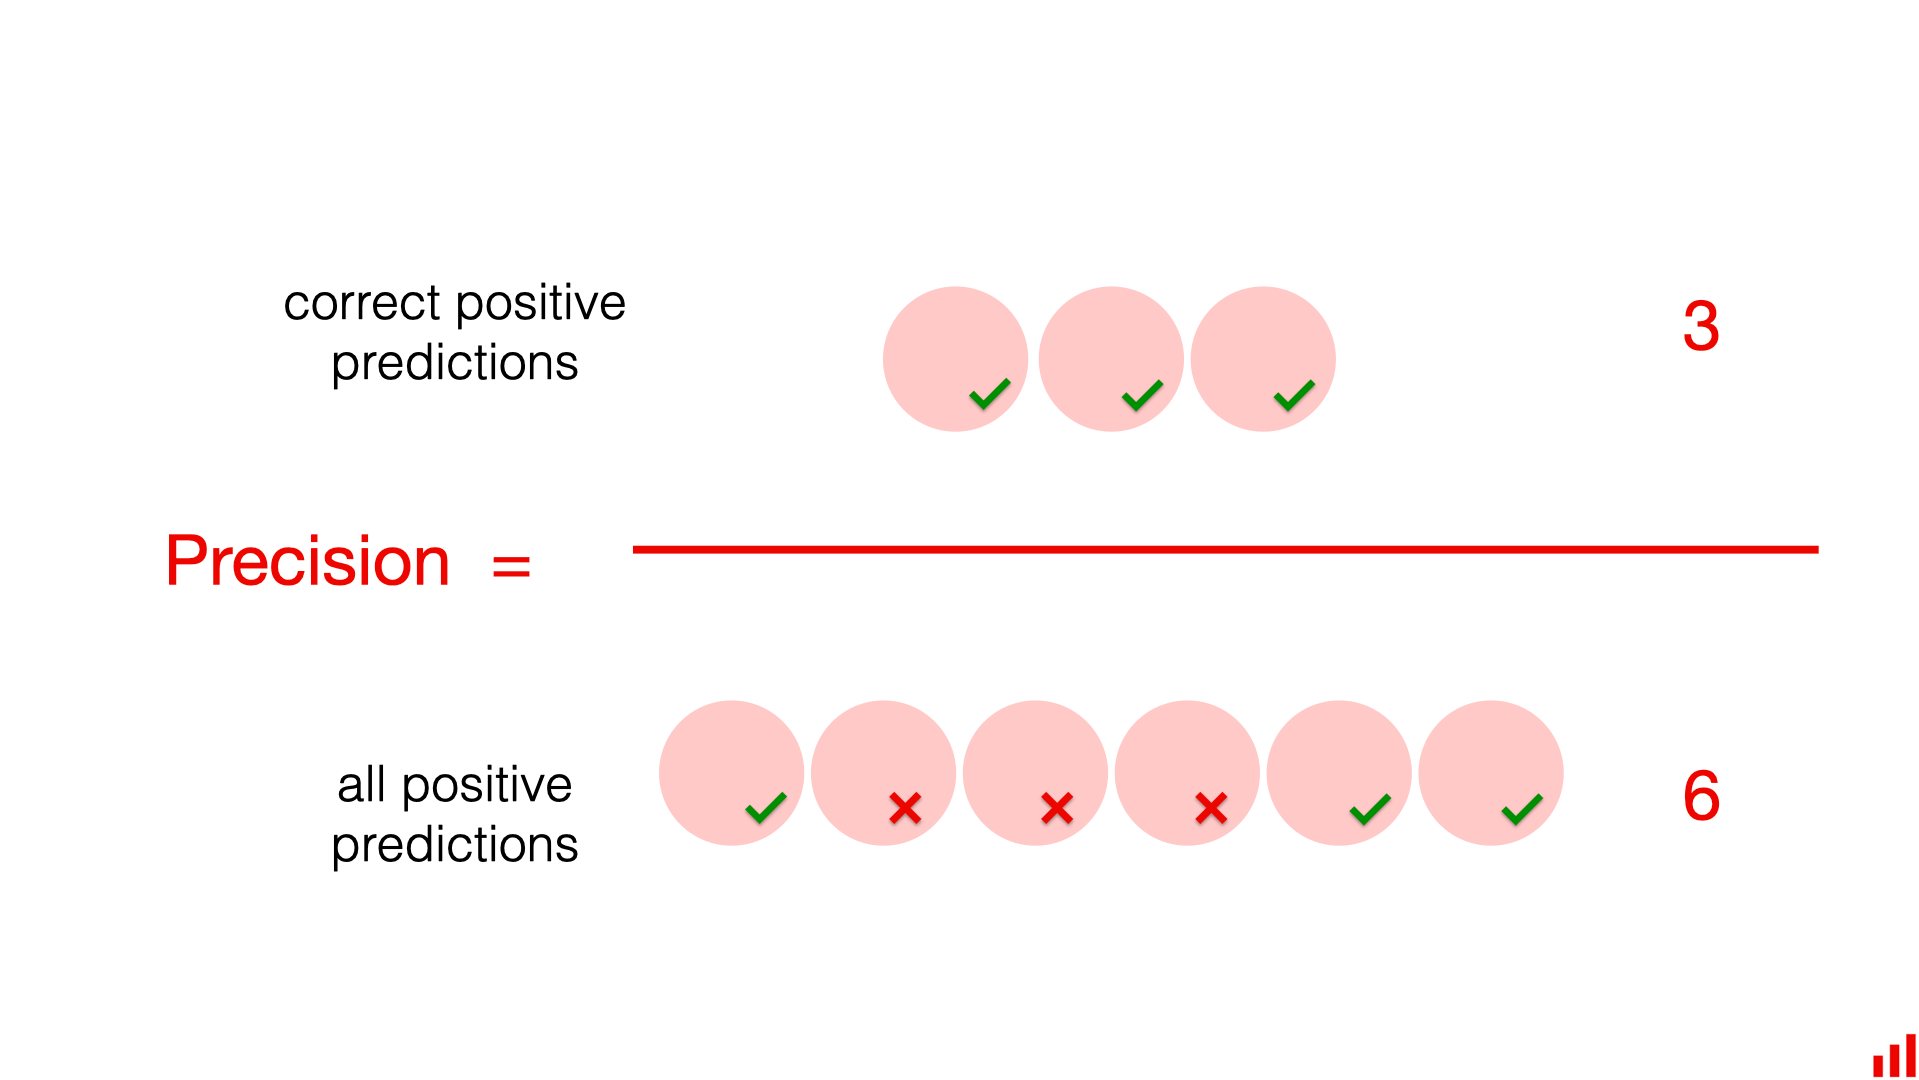

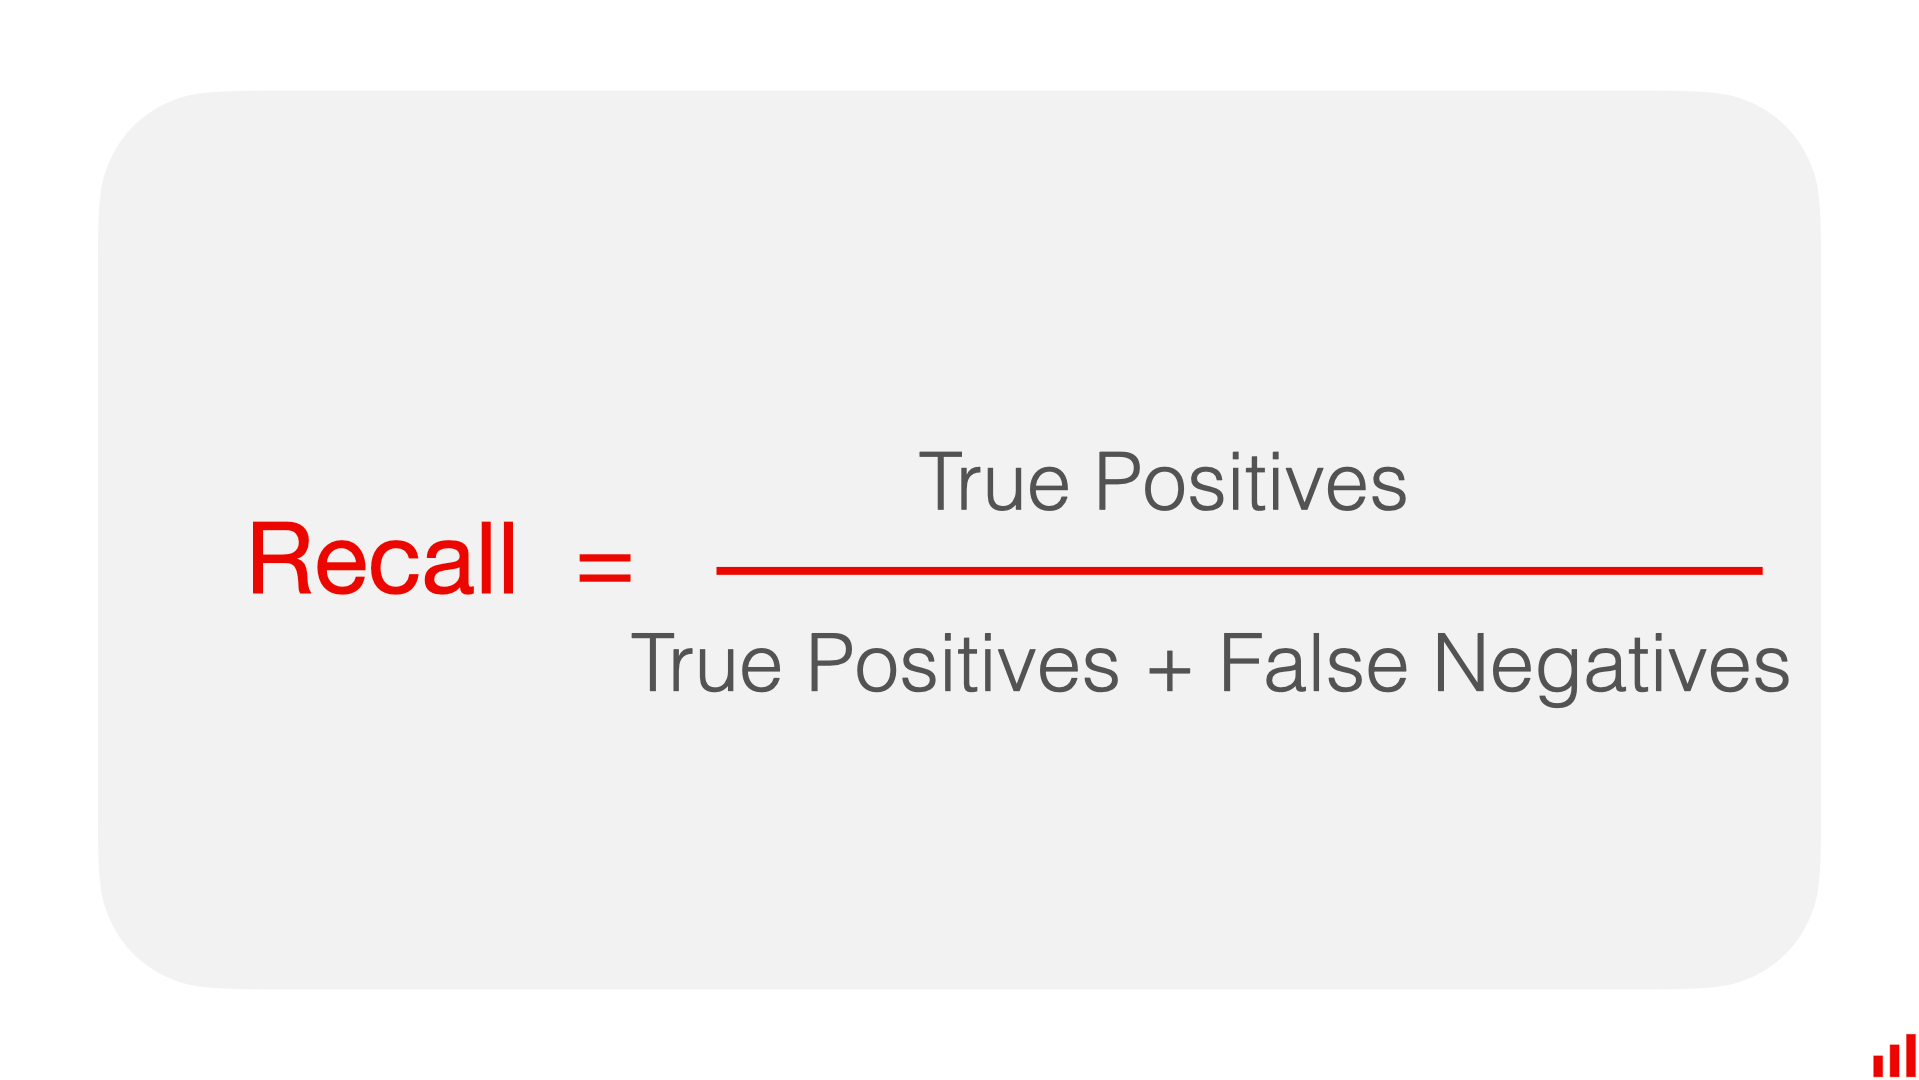

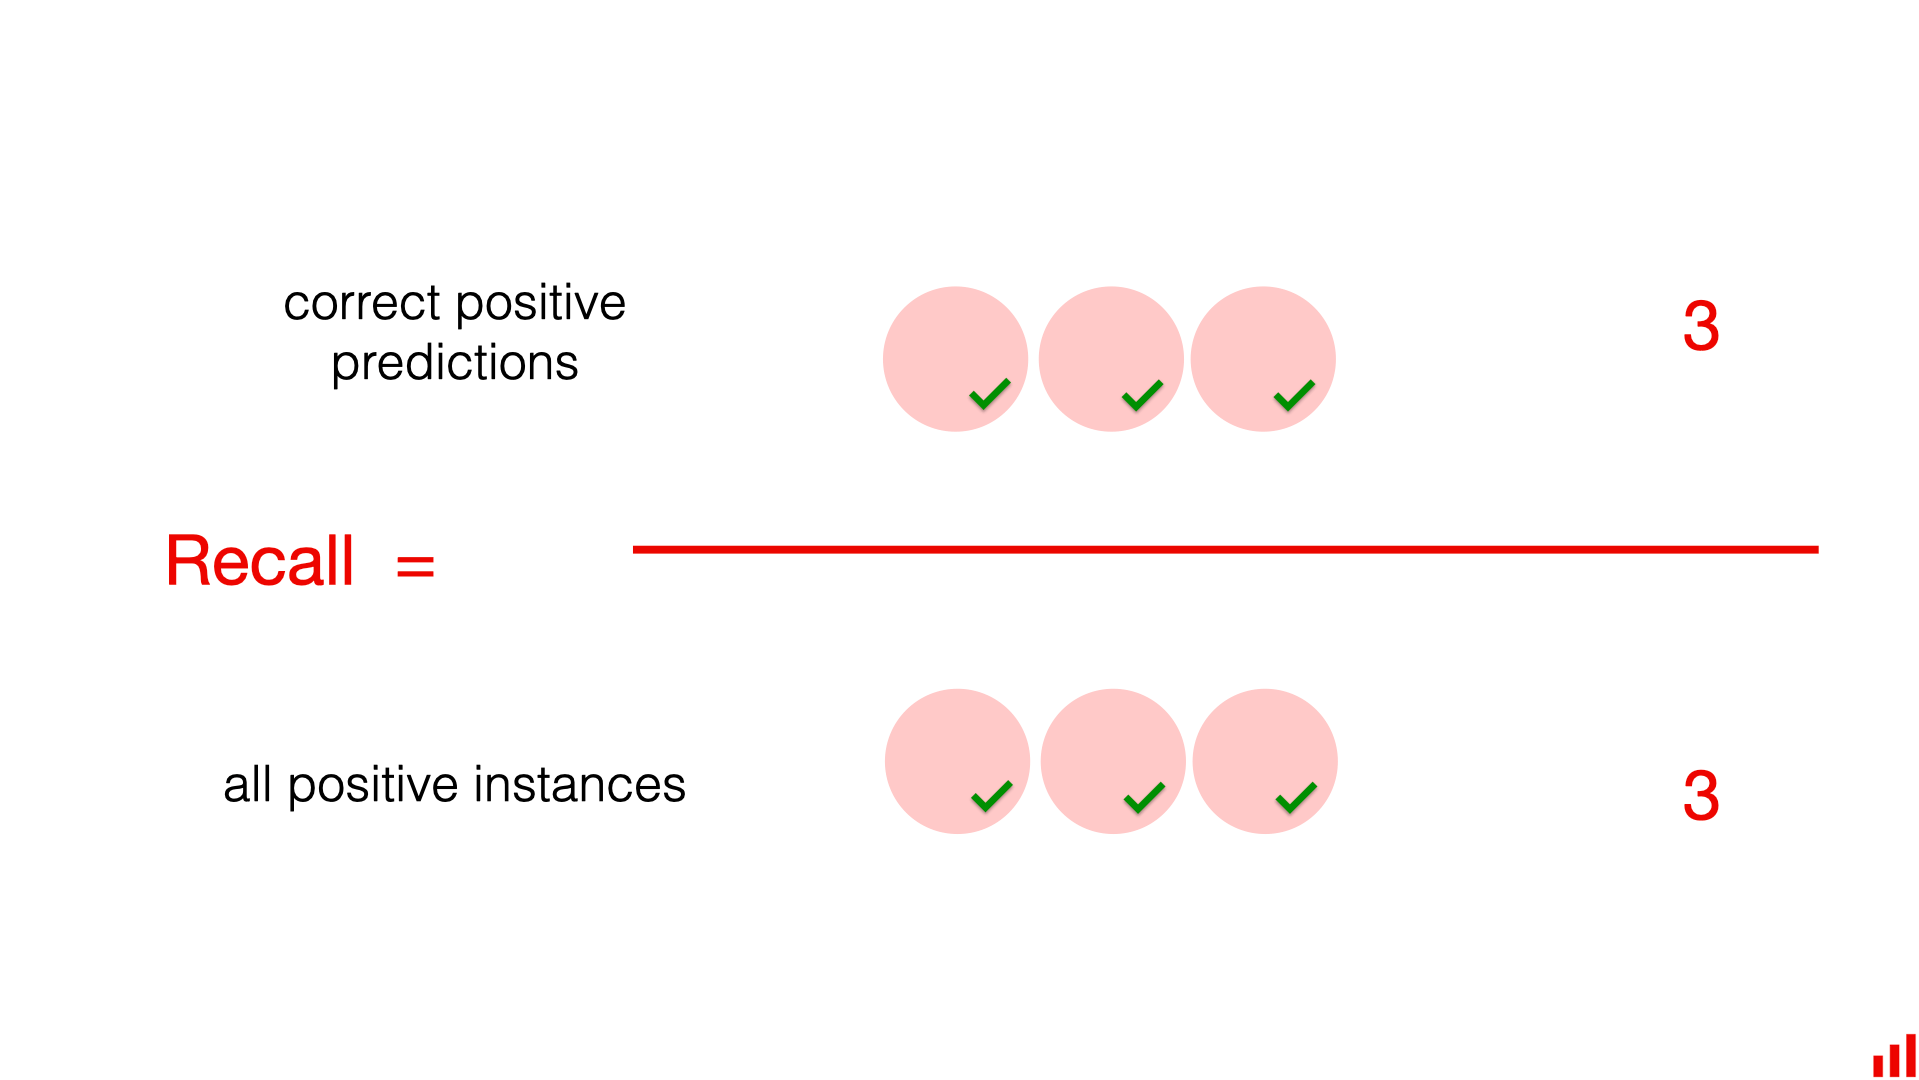

Please note in this example we didn't optimize the classifiers.

# :) Back to the task :)

TO SUBMIT: Summary of data exploration:

    Did this help you?
    A .What did you find? [5 points]
    B. What the data exploration tell you about the data and the possible attacks?[10 points]

# Supervised Machine Learning

Load the original dataset conn250K.csv and the label dataset:conn250K_anomaly.csv

In [354]:
# file path - this for linux windows you will need "//"
f_path = "conn_attack.csv"

'''
record ID - The unique identifier for each connection record.
duration_  This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes This field represents the number of data bytes transferred from the source to the destination (i.e., the amount of out-going bytes from the host).
dst_bytes This fea
ture represents the number of data bytes transferred from the destination to the source (i.e., the amount of bytes received by the host).
'''
df = pd.read_csv(f_path,names=["record_ID","duration_", "src_bytes","dst_bytes"], header=None)

In [355]:
df.shape

(256670, 4)

In [356]:
labels = pd.read_csv("conn_attack_anomaly_labels.csv",names=["record ID","label"], header=None) # Reading the new dataset

In [357]:
labels

,record ID,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
256665,256666,0
256666,256667,0
256667,256668,0
256668,256669,0


In [358]:
# df_label = labels # taking all thew labels
#df_label = labels.record_ID
df_label = labels.label
#print(df_label)

In [359]:
df_label.values # printing it as an array of the values that we've stored in the df_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [360]:
labels.shape

(256670, 2)

In [361]:
np.unique(labels.label) # what values we have here

array([0, 1], dtype=int64)

1. Create a supervised machine learning (use the labels). [20 points]


In [362]:
df

,record_ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450
...,...,...,...,...
256665,256666,0,306,236
256666,256667,0,288,4017
256667,256668,0,289,1096
256668,256669,0,198,2169


In [363]:
features = ["duration_","src_bytes","dst_bytes"]
X = df[features]
y = df_label.values # will be the values od the label column (0,0,0....)

In [364]:
X

,duration_,src_bytes,dst_bytes
0,0,236,1228
1,0,239,486
2,0,234,1364
3,0,239,1295
4,0,181,5450
...,...,...,...
256665,0,306,236
256666,0,288,4017
256667,0,289,1096
256668,0,198,2169


In [365]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [366]:
Short Video About Random Forest:
    https://www.youtube.com/watch?v=v6VJ2RO66Ag&ab_channel=NormalizedNerd

SyntaxError: invalid syntax (2340620848.py, line 1)

In [367]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
features = ["duration_","src_bytes","dst_bytes"]
df_label = labels.label
X = df[features]
y = df_label.values
clf = RandomForestClassifier(max_depth=2, random_state=None)
clf.fit(X, y) # here is the learnign

print(clf.predict(X)) # printing what the result of the predict

[0 0 0 ... 0 0 0]


In [368]:
clf.predict(X) == y # what we've predicted, comparing to y that this is the true values

array([ True,  True,  True, ...,  True,  True,  True])

In [369]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
import pickle

features = ["duration_", "src_bytes", "dst_bytes"]
X = df[features]
y = df_label.values
# create train and test sets -- TODO!!!
X_train, X_test, y_train, y_test = train_test_split(df[features], df_label, test_size=0.2,random_state=42)
# #X = df, y
# print(X.shape , y.shape)
# print(X_train)
# print(X_test.head())
# #rf = RandomForestClassifier(max_depth=2, random_state=0)

# rf = RandomForestClassifier(max_depth=2, random_state=0)
# rf.fit(X_train, y_train)
# y_predicted = rf.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_predicted)
# print("Accuracy:", accuracy)

# # Generate confusion matrix (use y_test and y_predicted)
# conf_matrix = confusion_matrix(y_test, y_predicted, labels=[0, 1])
# print("Confusion Matrix:")
# print(conf_matrix)

# Trying using KNN algorithm
knn = KNeighborsClassifier(n_neighbors=10,algorithm='auto')
knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

# Generate confusion matrix (use y_test and y_predicted)
conf_matrix = confusion_matrix(y_test, y_predicted, labels=[0, 1])
print("Confusion Matrix:")
print(conf_matrix)

# Trying to save

# Save the model to a file
with open('KNN_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

#loading the file
with open('KNN_model.pkl', 'rb') as file:
    loaded_knn = pickle.load(file)

# Use the loaded model
y_pred = loaded_knn.predict(X_test)
print("Predictions:", y_pred)

Accuracy: 0.99998051973351
Confusion Matrix:
[[51120     0]
 [    1   213]]
Predictions: [0 0 0 ... 0 0 0]


In [370]:
from sklearn.metrics import classification_report

target_names = ['0', '1']
print(classification_report(y_predicted, y_test, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51121
           1       1.00      1.00      1.00       213

    accuracy                           1.00     51334
   macro avg       1.00      1.00      1.00     51334
weighted avg       1.00      1.00      1.00     51334



2. What machine learning algorithms did you used? Why did you used them? [5 points]


In [371]:
Random forest, and KNN

SyntaxError: invalid syntax (2289646507.py, line 1)

4. Feature selection: which feature selection method did you used? [5 points]


In [ ]:
we gave accutally all the features except from the record_ID

5. How did you measured the preformance of the machine learning [5 points]
Note:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


6. plot AUC https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_roc_curve.html [5 points]


7. Following your answer in section (2). Can you improve your results? [10]
NOTE: https://scikit-learn.org/stable/modules/ensemble.html
How much did you improved?

# Unsupervised Learning (without labels)

8.Create Isolation forest algorithm compare your results to the supervised algorith. [20 points] measure your preformance usiong the labels
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

(256670, 3) (256670,)
Accuracy: 0.99998051973351
Confusion Matrix of RF:
[[51120     0]
 [    1   213]]

Isolation Forest Accuracy: 0.9217282892429969
Confusion Matrix of ISO:
[[47102  4018]
 [    0   214]]
Random Forest Accuracy (Supervised): 0.99998051973351
Isolation Forest Accuracy (Unsupervised): 0.9217282892429969


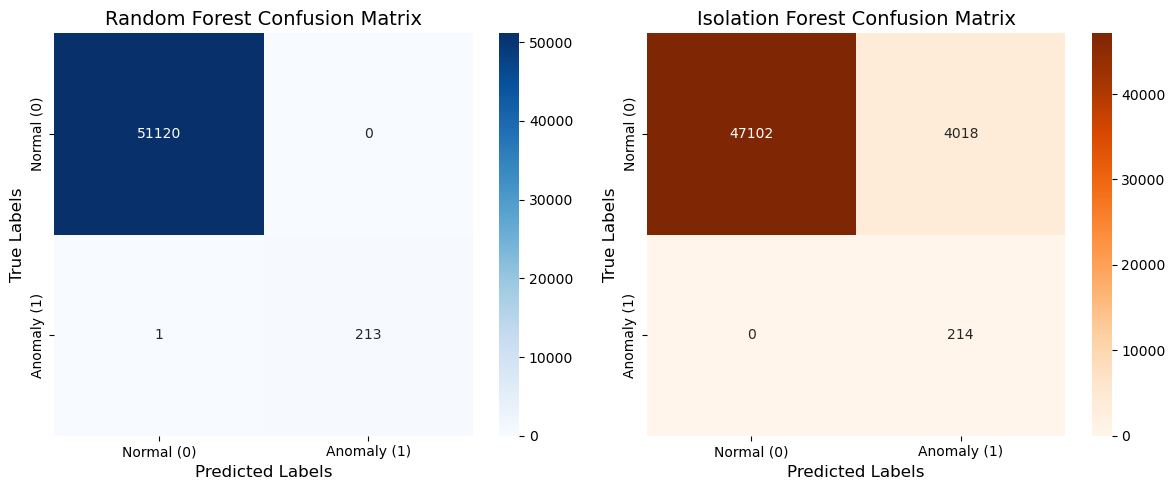

In [376]:
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

features = ["duration_", "src_bytes", "dst_bytes"]
X = df[features]
y = df_label.values
# Train-test split for supervised learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape, y.shape)

#print(X)
#print(y)

# # ---- Step 1: Supervised Learning (Random Forest) ----
rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)
# Generate confusion matrix (use y_test and y_predicted)

conf_matrix = confusion_matrix(y_test, y_pred_rf, labels=[0, 1])
print("Confusion Matrix of RF:")
print(conf_matrix)
print()
# ---- Step 2: Unsupervised Learning (Isolation Forest) ----
iso_forest = IsolationForest(random_state=42)
iso_forest.fit(X)  # Fit on the entire dataset (unsupervised)

# Predict anomalies (-1 for anomalies, 1 for normal data)
iso_forest = IsolationForest(random_state=42)
iso_forest.fit(X_train)  # Fit on training data only

# Predict anomalies (-1 for anomalies, 1 for normal data) on the test set
y_pred_iso = iso_forest.predict(X_test)

# Map Isolation Forest predictions (-1 -> 1 for anomalies, 1 -> 0 for normal)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

# Evaluate Isolation Forest using the test labels
accuracy_iso = accuracy_score(y_test, y_pred_iso)
print("Isolation Forest Accuracy:", accuracy_iso)

# Generate a classification report
conf_matrix2 = confusion_matrix(y_test, y_pred_iso, labels=[0, 1])
print("Confusion Matrix of ISO:")
print(conf_matrix2)


# print("Isolation Forest Classification Report:")
# print(classification_report(y_test, y_pred_iso, target_names=["Normal", "Anomaly"]))

# ---- Step 3: Compare Results ----
print(f"Random Forest Accuracy (Supervised): {accuracy_rf}")
print(f"Isolation Forest Accuracy (Unsupervised): {accuracy_iso}")

# import matplotlib.pyplot as plt
# import numpy as np

# # ---- Accuracy Comparison ----
# models = ['Random Forest (Supervised)', 'Isolation Forest (Unsupervised)']
# accuracies = [accuracy_rf, accuracy_iso]

# # Bar plot for accuracies
# plt.figure(figsize=(10, 6))
# plt.bar(models, accuracies, color=['blue', 'orange'], alpha=0.7)
# plt.ylim(0, 1)
# plt.title("Model Accuracy Comparison", fontsize=16)
# plt.ylabel("Accuracy", fontsize=12)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# for i, acc in enumerate(accuracies):
#     plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12, fontweight='bold')
# plt.show()

# # ---- Confusion Matrix Comparison ----
# # Confusion matrix values for Random Forest and Isolation Forest
# conf_rf = conf_matrix.ravel()  # Random Forest confusion matrix (TN, FP, FN, TP)
# conf_iso = conf_matrix2.ravel()  # Isolation Forest confusion matrix (TN, FP, FN, TP)

# labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# # Bar plot for confusion matrices
# x = np.arange(len(labels))
# width = 0.35

# plt.figure(figsize=(12, 6))
# plt.bar(x - width / 2, conf_rf, width, label='Random Forest', color='blue', alpha=0.7)
# plt.bar(x + width / 2, conf_iso, width, label='Isolation Forest', color='orange', alpha=0.7)

# plt.title("Confusion Matrix Comparison", fontsize=16)
# plt.ylabel("Counts", fontsize=12)
# plt.xticks(x, labels, fontsize=12)
# plt.yticks(fontsize=12)
# plt.legend(fontsize=12)
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Labels for confusion matrix axes
labels = ['Normal (0)', 'Anomaly (1)']

# ---- Heatmap for Random Forest Confusion Matrix ----
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# ---- Heatmap for Isolation Forest Confusion Matrix ----
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.title('Isolation Forest Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


9. Create DBSCAN algorithm [20 points] measure your preformance usiong the labels

10. Can you improve the unsupervised learning without using labels? Please write code [10 points] 

# Create the final submission results

What to submit:

1.email ,full name and ID

2. This notebook with all the answers. with diagrams
3. If you didnt manage to do some task please explain what did you tried to do.

In [ ]:
1